<a href="https://www.kaggle.com/code/mirzaabbasuddin/text-classification-using-naive-bayes?scriptVersionId=135900065" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv',encoding='latin-1')
df

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


**Dataset Preparing**

In [3]:
# column fixing
df.drop(columns = {'Unnamed: 0'},inplace = True)
df.rename(columns = {'0':'disease','a':'symptoms'},inplace = True)
df

,disease,symptoms
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [4]:
pd.set_option('display.max_colwidth',100)
df

,disease,symptoms
0,Thyroid_Cancer,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib ...
1,Thyroid_Cancer,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusiv..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperativ...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by a...
4,Thyroid_Cancer,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who presented with chief complaintsof shortness of breath ...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs reported previously the incidence of quadruple advanc...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally accepted and astem celllike subpopulation that is...
7568,Colon_Cancer,"""adipogenesis is the process through which mesenchymalstem cells mscs commit to the adipose line..."


In [5]:
# classes we have
df['disease'].value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: disease, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [7]:
# converting the class column text to to number using LabelEncoder
df['disease'] = label.fit_transform(df['disease'])
df

,disease,symptoms
0,2,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib ...
1,2,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusiv..."
2,2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperativ...
3,2,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by a...
4,2,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients ...
...,...,...
7565,0,we report the case of a 24yearold man who presented with chief complaintsof shortness of breath ...
7566,0,among synchronous colorectal cancers scrcs reported previously the incidence of quadruple advanc...
7567,0,the heterogeneity of cancer cells is generally accepted and astem celllike subpopulation that is...
7568,0,"""adipogenesis is the process through which mesenchymalstem cells mscs commit to the adipose line..."


In [8]:
df['disease'].value_counts()

2    2810
0    2580
1    2180
Name: disease, dtype: int64

**Dataset Spliting Into Train And Test**

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['symptoms'],df['disease'])

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5677,)
(1893,)
(5677,)
(1893,)


**Model Buidling Using sklearn Pipeline Class**

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [12]:
# model building
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [13]:
# training the model

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [14]:
clf.score(X_test,y_test)

0.9334389857369255

In [15]:
y_predicted = clf.predict(X_test)

**Generating Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[554,   0,  43],
       [  0, 539,   0],
       [ 83,   0, 674]])

**Visualizing The Confusion Matrix**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

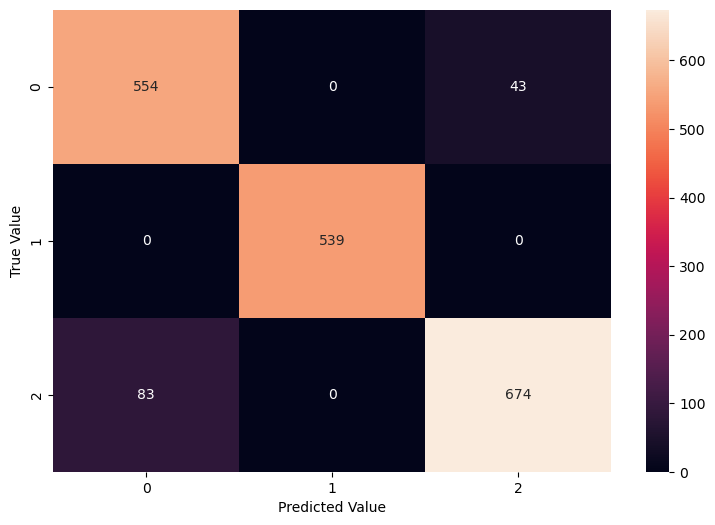

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

**Generating Classification Report**

In [19]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       597
           1       1.00      1.00      1.00       539
           2       0.94      0.89      0.91       757

    accuracy                           0.93      1893
   macro avg       0.94      0.94      0.94      1893
weighted avg       0.93      0.93      0.93      1893



**Chceking the model with some manual test case**

In [20]:
def predict(text):
    prediction = clf.predict([text])
    if prediction == 0:
        return 'Colon Cancer'
    elif prediction == 1:
        return 'Thyroid Cancer'
    elif prediction == 2:
        return 'Lung Cancer'

In [21]:
input_text = "Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib"
prediction = predict(input_text)
print(prediction)

Lung Cancer
